In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [7]:
def bar_plot(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead= train[train['Survived']==0][feature].value_counts()
    data=pd.DataFrame([survived,dead])
    data.index=['Survived','Dead']
    data.plot(kind='bar',figsize=(10,5))

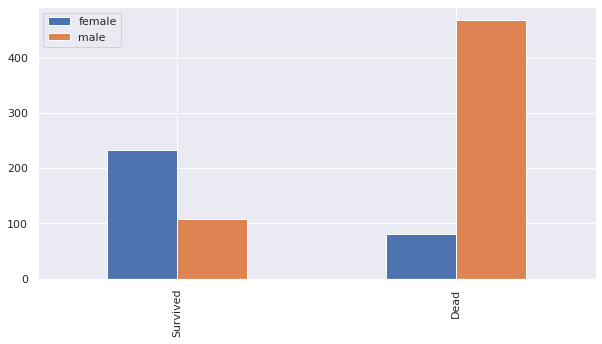

In [8]:
bar_plot('Sex')

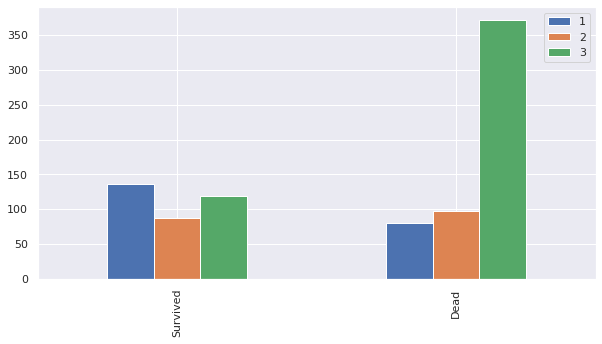

In [9]:
bar_plot('Pclass')

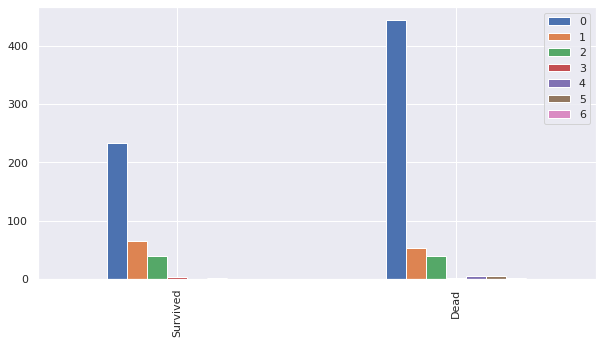

In [10]:
 bar_plot('Parch')

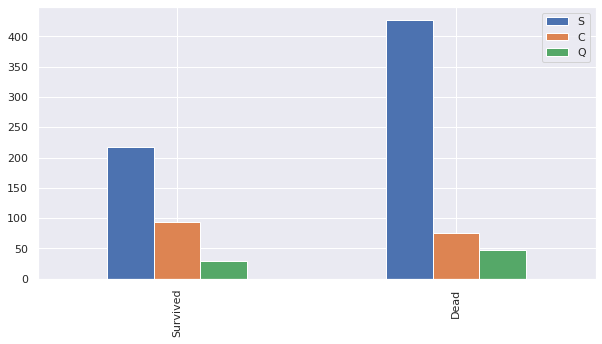

In [11]:
 bar_plot('Embarked')

In [12]:
 combined=[train, test] # combining train and test dataset
 
for dataset in combined:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [13]:
 train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Lady          1
Countess      1
Mme           1
Jonkheer      1
Don           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [14]:
 title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title_mapping)

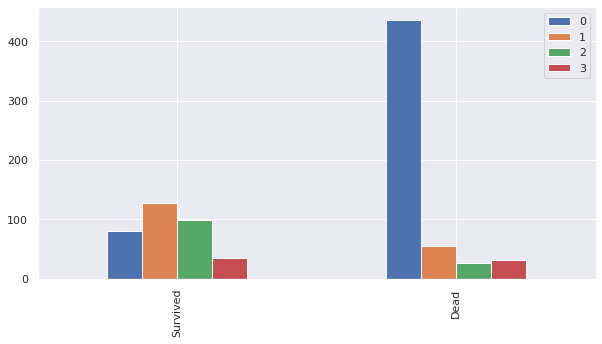

In [15]:
bar_plot('Title')

In [16]:
 train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [17]:
 sex_mapping = {"male": 0, "female": 1}
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [18]:
 train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
 for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [21]:
 embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [22]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [23]:
dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0

In [24]:
dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1

In [25]:
 dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2

In [26]:
 dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


In [28]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [29]:
 
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [30]:
 features_drop = ['SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [31]:
 train_data = train.drop('Survived', axis=1)
target = train['Survived']
 
train_data.shape, target.shape

((891, 6), (891,))

In [32]:
train_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title
0,3,0,22.0,7.2500,0,0
1,1,1,38.0,71.2833,1,2
2,3,1,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,2
4,3,0,35.0,8.0500,0,0


In [33]:
from sklearn.svm import SVC

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2)

In [35]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  

              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 

              'kernel': ['rbf']}  

  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

  
# fitting the model for grid search 
grid.fit(X_train, y_train)
gd=grid.score(X_test, y_test)
gd

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.608, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.608, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.608, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.606, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.678, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.678, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.662, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.641, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.7s finished


0.8156424581005587

In [36]:
tested_data = test.drop("PassengerId", axis=1).copy()
prediction = grid.predict(tested_data)

In [37]:
sub = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

sub.to_csv('submission.csv', index=False)

In [38]:
submit = pd.read_csv('submission.csv')
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
